In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
bank=pd.read_csv(r"C:/Training/Final Project/bank-additional-full.csv")
bank_test=pd.read_csv(r"C:/Training/Final Project/test_dataset.csv")

In [2]:
bank.shape, bank_test.shape

((41188, 21), (4119, 20))

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
bank.rename(columns={'y':'deposit'}, inplace=True)

In [9]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
bank.isnull().sum()    # No NA values in the dataset

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [38]:
pd.crosstab(bank.job, bank.education)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [665]:
bank_test['job'][bank_test['age']>60].value_counts()

retired          51
housemaid         9
unknown           4
management        3
blue-collar       3
technician        3
admin.            3
self-employed     2
unemployed        1
Name: job, dtype: int64

In [13]:
bank.loc[(bank['age']>60) & (bank['job']=='unknown'), 'job'] = 'retired'
bank_test.loc[(bank_test['age']>60) & (bank_test['job']=='unknown'), 'job'] = 'retired'

In [14]:
# Imputing unknown values for education based on job
bank.loc[(bank['education']=='unknown') & (bank['job']=='management'), 'education'] = 'university.degree'
bank.loc[(bank['education']=='unknown') & (bank['job']=='admin.'), 'education'] = 'university.degree'
bank.loc[(bank['education']=='unknown') & (bank['job']=='services'), 'education'] = 'high.school'
bank.loc[(bank['education']=='unknown') & (bank['job']=='housemaid'), 'education'] = 'basic.4y'
bank.loc[(bank['education']=='unknown') & (bank['job']=='technician'), 'education'] = 'professional.course'
bank.loc[(bank['education']=='unknown') & (bank['job']=='student'), 'education'] = 'high.school'
bank.loc[(bank['education']=='unknown') & (bank['job']=='blue-collar'), 'education'] = 'basic.9y'

In [15]:
# Imputing unknown values for job based on education
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='university.degree'), 'job'] = 'admin.'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.4y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.6y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.9y'), 'job'] = 'blue-collar'
bank.loc[(bank['job']=='unknown') & (bank['education']=='professional.course'), 'job'] = 'technician'

In [16]:
# Imputing unknown values for education based on job
bank_test.loc[(bank_test['education']=='unknown') & (bank_test['job']=='management'), 'education'] = 'university.degree'
bank_test.loc[(bank_test['education']=='unknown') & (bank_test['job']=='admin.'), 'education'] = 'university.degree'
bank_test.loc[(bank_test['education']=='unknown') & (bank_test['job']=='services'), 'education'] = 'high.school'
bank_test.loc[(bank_test['education']=='unknown') & (bank_test['job']=='housemaid'), 'education'] = 'basic.4y'
bank_test.loc[(bank_test['education']=='unknown') & (bank_test['job']=='technician'), 'education'] = 'professional.course'
bank_test.loc[(bank_test['education']=='unknown') & (bank_test['job']=='student'), 'education'] = 'high.school'
bank_test.loc[(bank_test['education']=='unknown') & (bank_test['job']=='blue-collar'), 'education'] = 'basic.9y'

In [17]:
# Imputing unknown values for job based on education
bank_test.loc[(bank_test['job'] == 'unknown') & (bank_test['education']=='university.degree'), 'job'] = 'admin.'
bank_test.loc[(bank_test['job'] == 'unknown') & (bank_test['education']=='basic.4y'), 'job'] = 'blue-collar'
bank_test.loc[(bank_test['job'] == 'unknown') & (bank_test['education']=='basic.6y'), 'job'] = 'blue-collar'
bank_test.loc[(bank_test['job'] == 'unknown') & (bank_test['education']=='basic.9y'), 'job'] = 'blue-collar'
bank_test.loc[(bank_test['job']=='unknown') & (bank_test['education']=='professional.course'), 'job'] = 'technician'

In [18]:
# Imputing mode for unknown values in housing, loan, default and marital
bank['housing']=bank['housing'].replace('unknown','yes')
bank['loan']=bank['loan'].replace('unknown','no')
bank['default']=bank['default'].replace('unknown','no')
bank['marital']=bank['marital'].replace('unknown','married')

bank_test['housing']=bank_test['housing'].replace('unknown','yes')
bank_test['loan']=bank_test['loan'].replace('unknown','no')
bank_test['default']=bank_test['default'].replace('unknown','no')
bank_test['marital']=bank_test['marital'].replace('unknown','married')

In [19]:
bank.deposit.value_counts(normalize=True) *100

no     88.734583
yes    11.265417
Name: deposit, dtype: float64

In [20]:
bank.deposit.value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

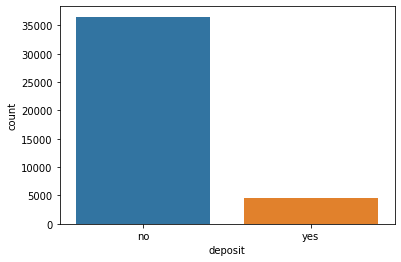

In [251]:
sns.countplot(x='deposit', data=bank)

In [1416]:
bank.job.value_counts(normalize=True) * 100

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

In [48]:
job_cross_perc=(pd.crosstab(bank.deposit, bank.job, margins=True)/len(bank))*100
job_cross_perc

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
deposit,,,,,,,,,,,,,
no,22.101097,21.149364,3.233952,2.316209,6.302807,3.153831,3.088278,8.852093,1.456735,14.620763,2.112266,0.347189,88.734583
yes,3.309216,1.563562,0.301059,0.257357,0.796348,1.073128,0.361756,0.784209,0.667670,1.774789,0.349616,0.026707,11.265417
All,25.410314,22.712926,3.535010,2.573565,7.099155,4.226959,3.450034,9.636302,2.124405,16.395552,2.461882,0.373895,100.000000


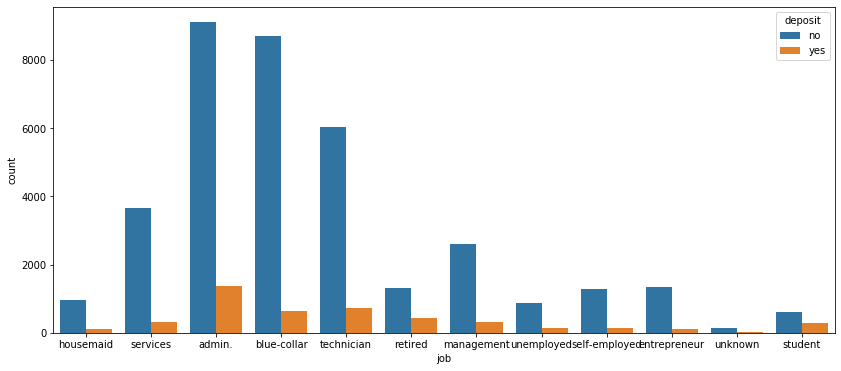

In [49]:
fig=plt.figure(figsize=(14,6))
sns.countplot(x='job', data=bank, hue='deposit')

In [1272]:
bank.marital.value_counts(normalize=True) * 100

married     60.716714
single      28.085850
divorced    11.197436
Name: marital, dtype: float64

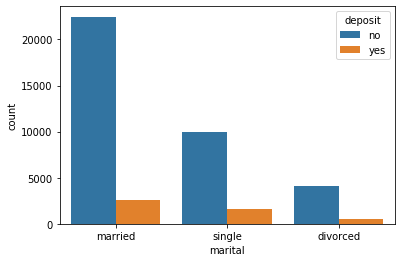

In [1273]:
sns.countplot(x='marital', data=bank, hue='deposit')

In [302]:
bank.education.value_counts(normalize=True) * 100

university.degree      30.445761
high.school            23.871030
basic.9y               15.778868
professional.course    13.244149
basic.4y               10.240847
basic.6y                5.564728
unknown                 0.810916
illiterate              0.043702
Name: education, dtype: float64

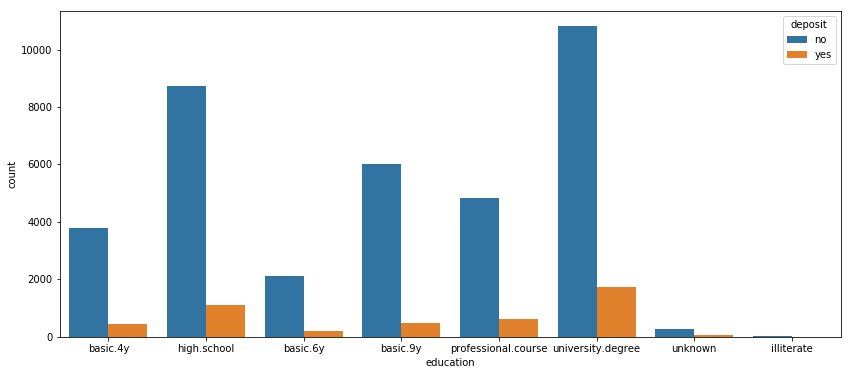

In [303]:
fig=plt.figure(figsize=(14,6))
sns.countplot(x='education', data=bank, hue='deposit')

In [98]:
bank.default.value_counts(normalize=True) * 100

no     99.992716
yes     0.007284
Name: default, dtype: float64

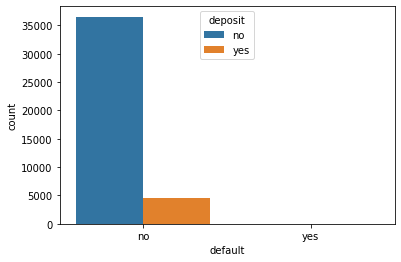

In [99]:
sns.countplot(x='default', data=bank, hue='deposit')

In [100]:
bank.housing.value_counts(normalize=True) * 100

yes    54.787802
no     45.212198
Name: housing, dtype: float64

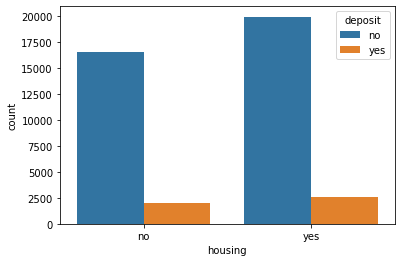

In [101]:
sns.countplot(x='housing', data=bank, hue='deposit')

In [1303]:
bank.loan.value_counts(normalize=True) * 100

no     84.830533
yes    15.169467
Name: loan, dtype: float64

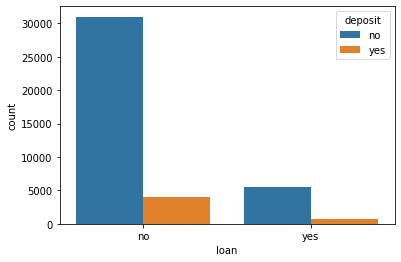

In [1304]:
sns.countplot(x='loan', data=bank, hue='deposit')

In [28]:
bank.contact.value_counts(normalize=True) * 100

cellular     63.474798
telephone    36.525202
Name: contact, dtype: float64

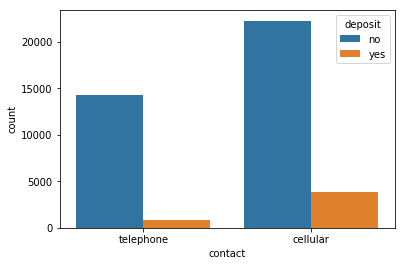

In [311]:
sns.countplot(x='contact', data=bank, hue='deposit')

In [164]:
contact_cross_perc=(pd.crosstab(bank.deposit, bank.contact, margins=True)/len(bank))*100
contact_cross_perc

contact,cellular,telephone,All
deposit,,,
no,54.120132,34.614451,88.734583
yes,9.354666,1.910751,11.265417
All,63.474798,36.525202,100.000000


In [312]:
bank.month.value_counts(normalize=True) * 100

may    33.429640
jul    17.417694
aug    14.999514
jun    12.911528
nov     9.956784
apr     6.390211
oct     1.743226
sep     1.383898
mar     1.325629
dec     0.441876
Name: month, dtype: float64

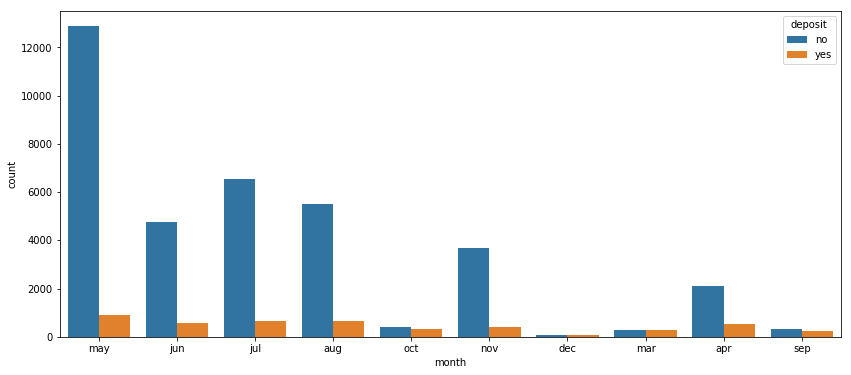

In [313]:
fig=plt.figure(figsize=(14,6))
sns.countplot(x='month', data=bank, hue='deposit')

In [314]:
bank.day_of_week.value_counts(normalize=True) * 100

thu    20.935709
mon    20.671069
wed    19.748470
tue    19.641643
fri    19.003108
Name: day_of_week, dtype: float64

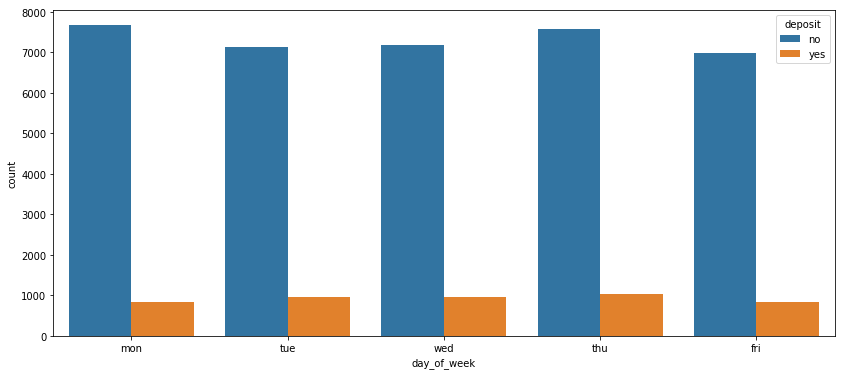

In [315]:
fig=plt.figure(figsize=(14,6))
sns.countplot(x='day_of_week', data=bank, hue='deposit')

In [316]:
bank.poutcome.value_counts(normalize=True) * 100

nonexistent    86.343110
failure        10.323395
success         3.333495
Name: poutcome, dtype: float64

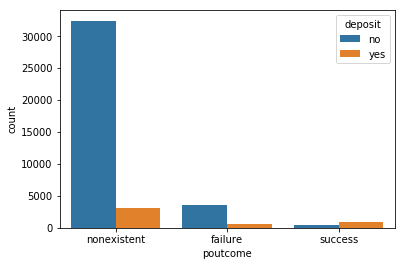

In [317]:
sns.countplot(x='poutcome', data=bank, hue='deposit')
# Below plot indicates most of the cusotmers are new customers as their outcome of previous campaigns does not exist.
# But we can see that customers who had a successful result, did subcribe to the term deposit.

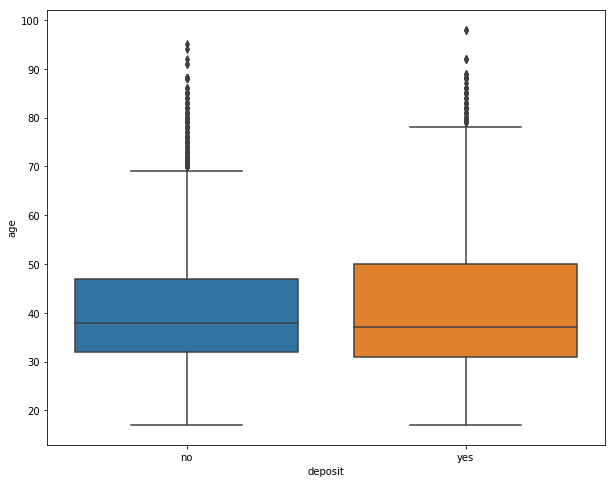

In [318]:
plt.figure(figsize=(10,8))
sns.boxplot(data=bank, x="deposit", y="age")
plt.show()
# Median is almost same in both cases, so age does not seem to be an important factor 
# in deciding if the customer will opt for term deposit

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


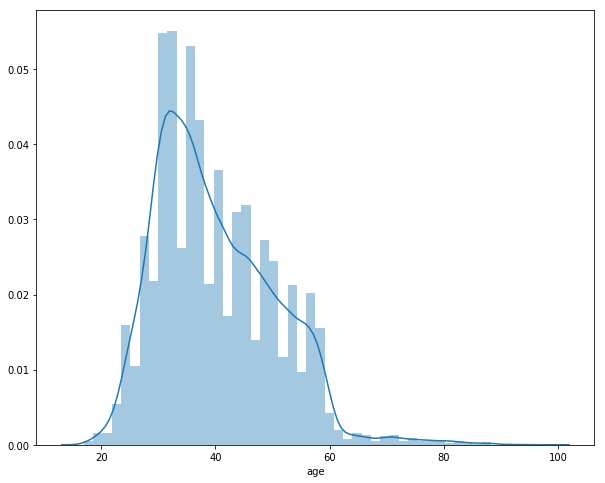

In [319]:
plt.figure(figsize=(10,8))
sns.distplot(bank["age"])

In [214]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [583]:
# Check skewness of numerical data
bank.skew(axis=0)
# cons.price.idx, cons.conf.idx are normally distributed
# Rest all columns are skewed

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [584]:
bank_test.skew(axis=0)

age               0.715694
duration          3.294781
campaign          4.003185
pdays            -4.775139
previous          4.022979
emp.var.rate     -0.727688
cons.price.idx   -0.216641
cons.conf.idx     0.287309
euribor3m        -0.715080
nr.employed      -1.075877
dtype: float64

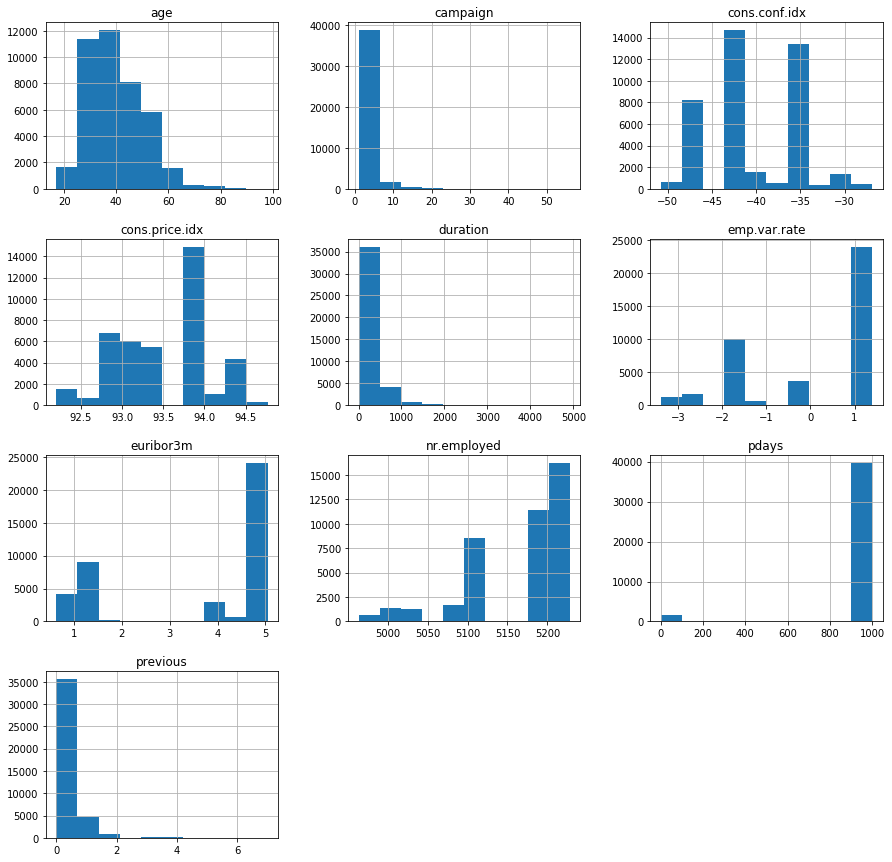

In [585]:
bank.hist(figsize=(15,15))
plt.show()

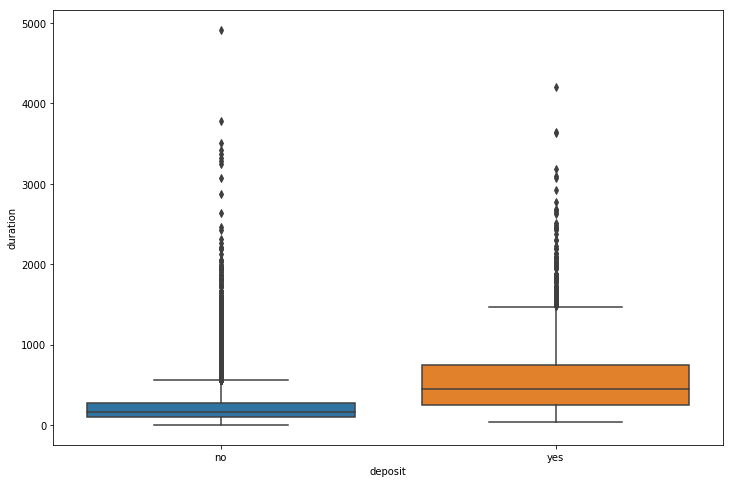

In [320]:
plt.figure(figsize=(12,8))
sns.boxplot(data=bank, x="deposit", y="duration")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


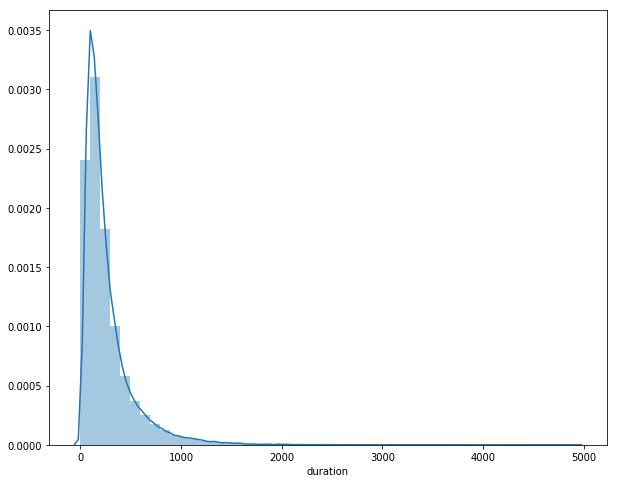

In [321]:
plt.figure(figsize=(10,8))
sns.distplot(bank["duration"])

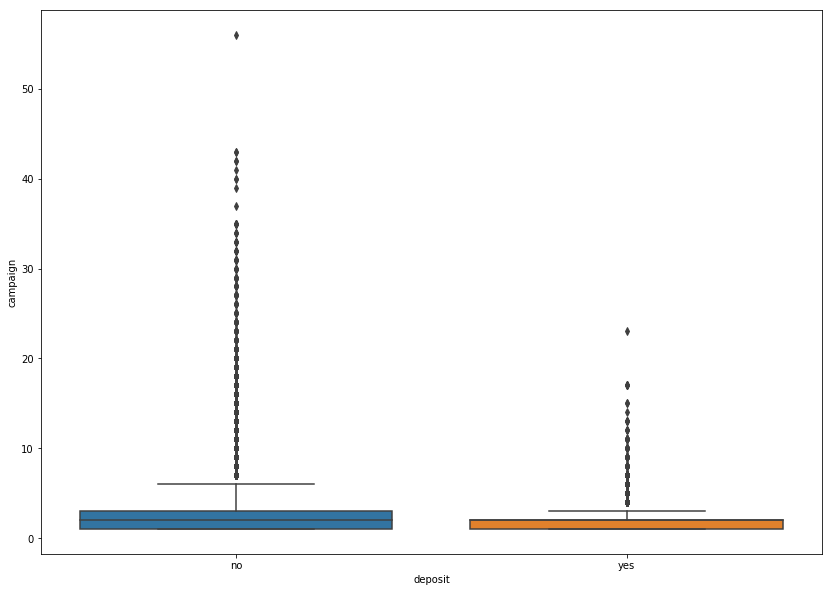

In [322]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bank, x="deposit", y="campaign")
plt.show()    # Outliers

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


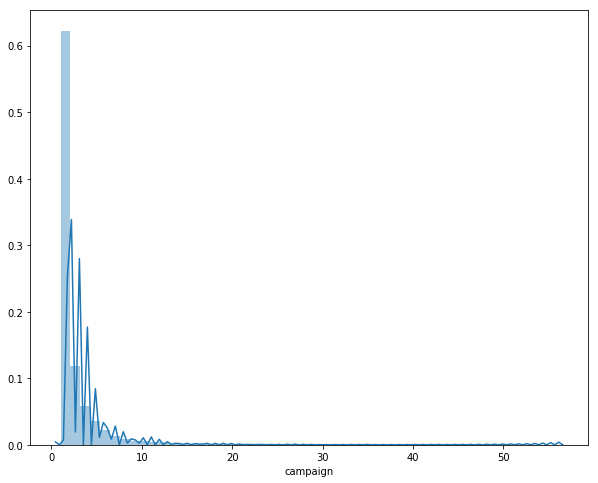

In [323]:
plt.figure(figsize=(10,8))
sns.distplot(bank["campaign"])

In [324]:
camp_cross_perc=(pd.crosstab(bank.deposit, bank.campaign, margins=True)/len(bank))*100
camp_cross_perc

campaign,1,2,3,4,5,6,7,8,9,10,...,34,35,37,39,40,41,42,43,56,All
deposit,,,,,,,,,,,,,,,,,,,,,
no,37.248713,22.722638,11.573759,5.831796,3.590852,2.194814,1.434884,0.929882,0.645819,0.517141,...,0.007284,0.012139,0.002428,0.002428,0.004856,0.002428,0.004856,0.004856,0.002428,88.734583
yes,5.584151,2.940177,1.393610,0.604545,0.291347,0.182092,0.092260,0.041274,0.041274,0.029135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.265417
All,42.832864,25.662814,12.967369,6.436341,3.882199,2.376906,1.527144,0.971157,0.687093,0.546276,...,0.007284,0.012139,0.002428,0.002428,0.004856,0.002428,0.004856,0.004856,0.002428,100.000000


In [347]:
bank.campaign.value_counts()

1     17632
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


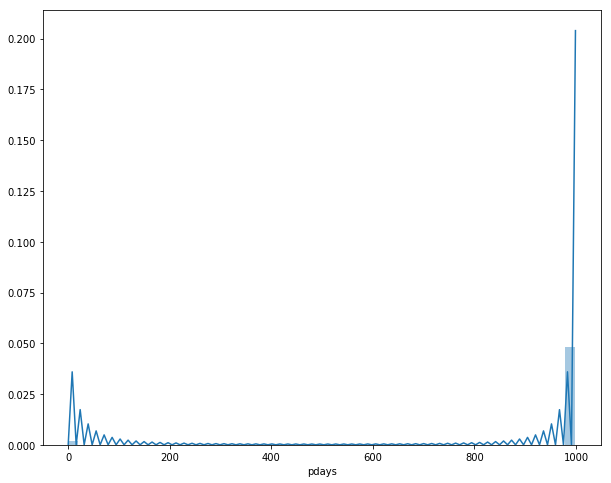

In [326]:
plt.figure(figsize=(10,8))
sns.distplot(bank["pdays"])

In [732]:
bank.pdays.value_counts()    # Majority of the customers were not contacted previously

30    39673
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
0        15
16       11
17        8
18        7
19        3
22        3
21        2
27        1
20        1
25        1
26        1
Name: pdays, dtype: int64

In [731]:
pd.crosstab(bank.deposit, bank.pdays)

pdays,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,25,26,27,30
deposit,,,,,,,,,,,,,,,,,,,,,
no,5,18,24,141,55,17,123,20,6,29,...,6,3,2,1,0,1,0,0,0,36000
yes,10,8,37,298,63,29,289,40,12,35,...,2,4,1,0,2,2,1,1,1,3673


In [729]:
bank.pdays.replace({999 : 30}, inplace=True)

In [730]:
bank_test.pdays.replace({999 : 30}, inplace=True)

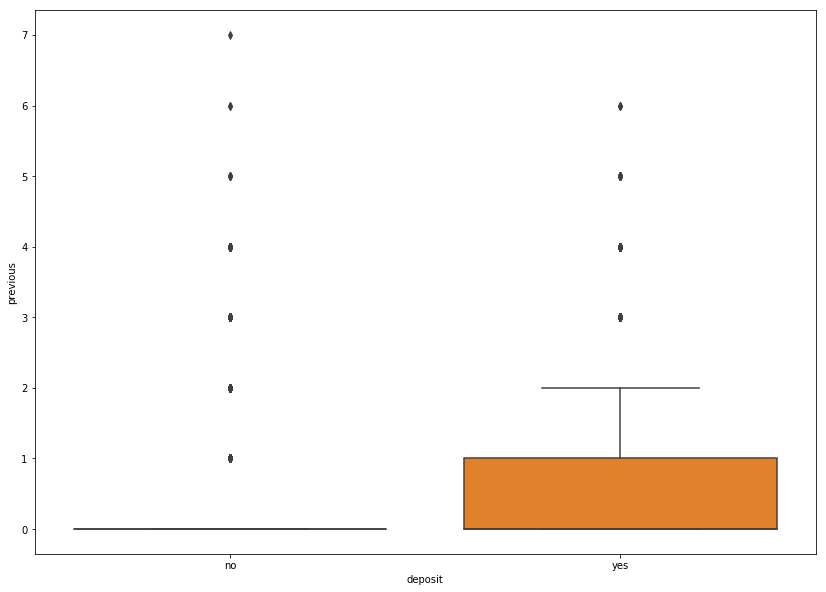

In [328]:
plt.figure(figsize=(14,10))
sns.boxplot(data=bank, x="deposit", y="previous")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


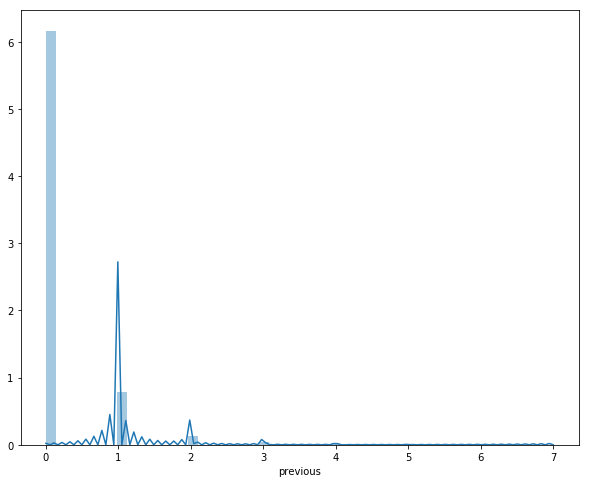

In [329]:
plt.figure(figsize=(10,8))
sns.distplot(bank["previous"])

In [330]:
prev_cross_perc=(pd.crosstab(bank.deposit, bank.previous, margins=True)/len(bank))*100
prev_cross_perc

previous,0,1,2,3,4,5,6,7,All
deposit,,,,,,,,,
no,78.717102,8.725842,0.980868,0.213654,0.077693,0.012139,0.004856,0.002428,88.734583
yes,7.626008,2.347771,0.849762,0.310770,0.092260,0.031563,0.007284,0.000000,11.265417
All,86.343110,11.073614,1.830630,0.524425,0.169952,0.043702,0.012139,0.002428,100.000000


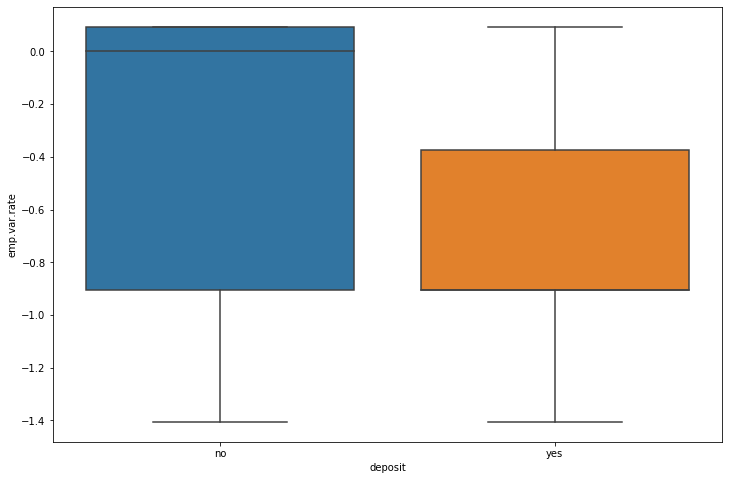

In [139]:
plt.figure(figsize=(12,8))
sns.boxplot(data=bank, x="deposit", y="emp.var.rate")
plt.show()

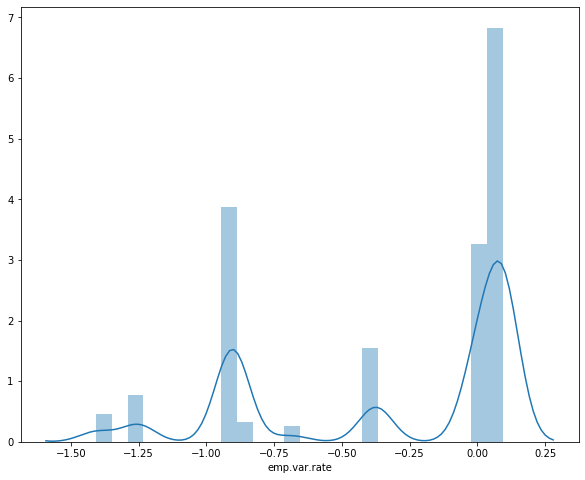

In [140]:
plt.figure(figsize=(10,8))
sns.distplot(bank["emp.var.rate"])

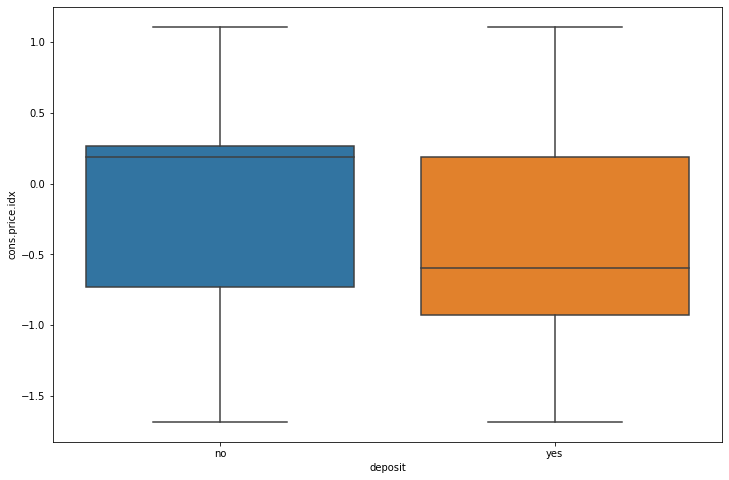

In [141]:
plt.figure(figsize=(12,8))
sns.boxplot(data=bank, x="deposit", y="cons.price.idx")
plt.show()

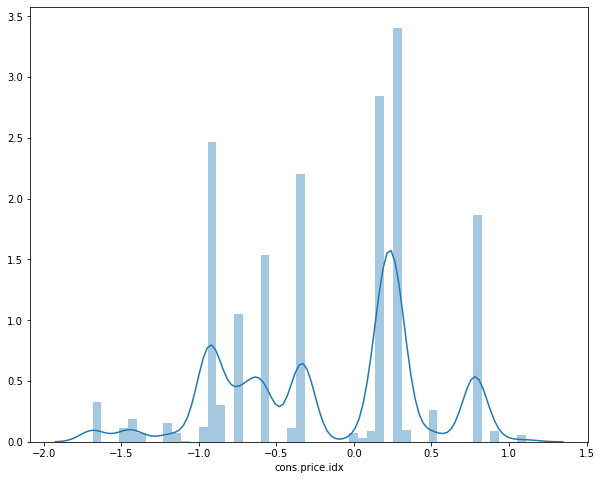

In [143]:
plt.figure(figsize=(10,8))
sns.distplot(bank["cons.price.idx"])

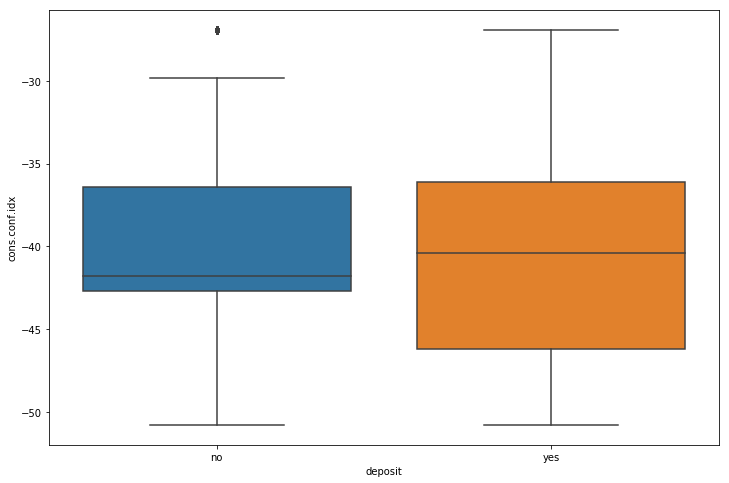

In [335]:
plt.figure(figsize=(12,8))
sns.boxplot(data=bank, x="deposit", y="cons.conf.idx")
plt.show()

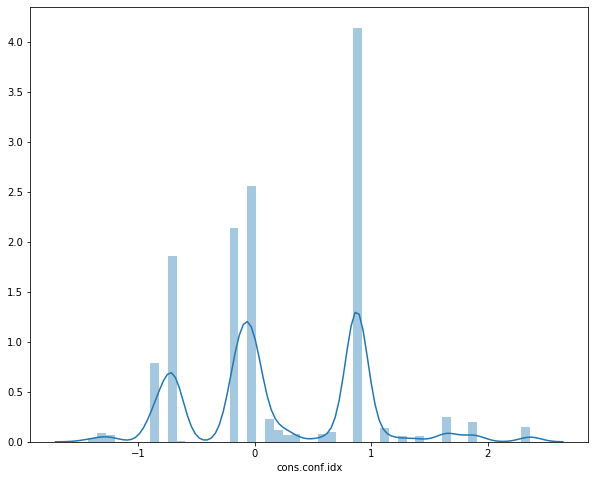

In [144]:
plt.figure(figsize=(10,8))
sns.distplot(bank["cons.conf.idx"])

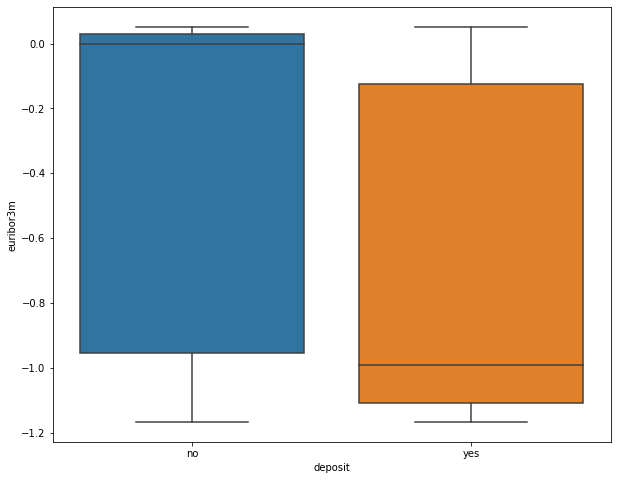

In [145]:
plt.figure(figsize=(10,8))
sns.boxplot(data=bank, x="deposit", y="euribor3m")
plt.show()

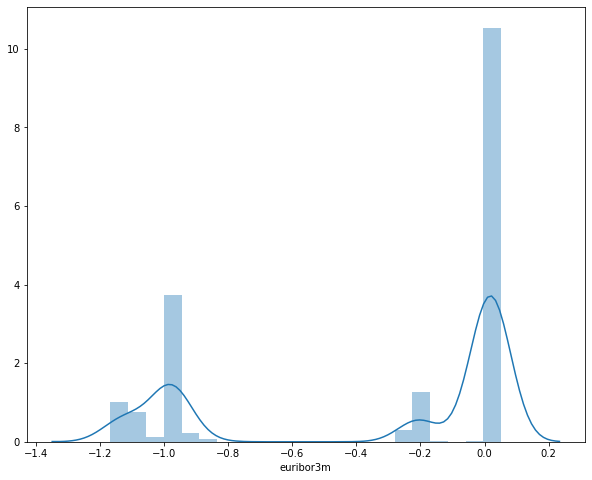

In [146]:
plt.figure(figsize=(10,8))
sns.distplot(bank["euribor3m"])

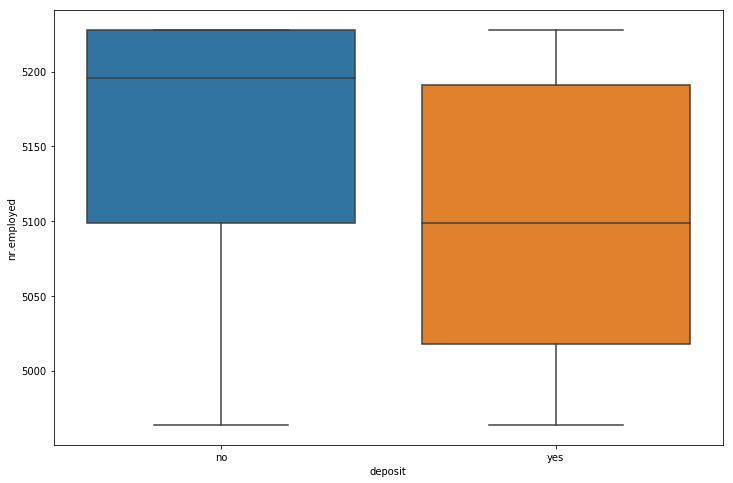

In [339]:
plt.figure(figsize=(12,8))
sns.boxplot(data=bank, x="deposit", y="nr.employed")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


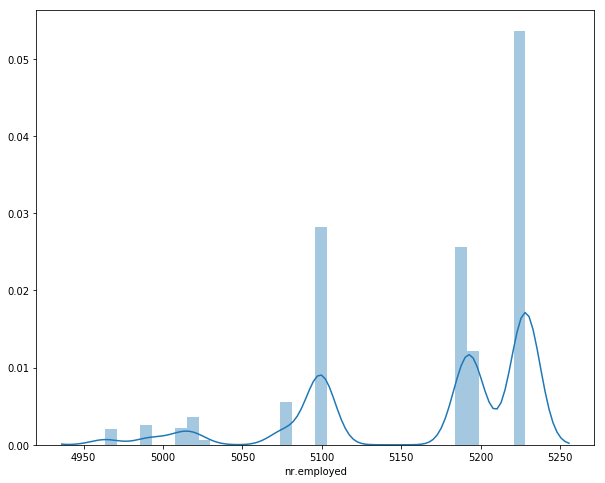

In [340]:
plt.figure(figsize=(10,8))
sns.distplot(bank["nr.employed"])

In [1060]:
#outlier_cols=['age']
#for cols in outlier_cols:
 #   Q1 = bank[cols].quantile(0.25)
  #  Q3 = bank[cols].quantile(0.75)
   # IQR = Q3 - Q1     
#
 #   no_outliers = (bank[cols] >= Q1 - 1.5 * IQR) & (bank[cols] <= Q3 + 1.5 *IQR)
  #  bank=bank.loc[no_outliers]

In [21]:
bank.loc[bank['pdays'] == 999, 'pdays'] = 0
bank.loc[bank['pdays'] != 0, 'pdays'] = 1

bank_test.loc[bank_test['pdays'] == 999, 'pdays'] = 0
bank_test.loc[bank_test['pdays'] != 0, 'pdays'] = 1

In [22]:
bank.deposit.replace({"yes" : 1, "no" : 0}, inplace=True)

In [58]:
bank.corr()    # Correlation matrix

# emp.var.rate and nr.employed are highly correlated (0.90)
# emp.var.rate and euribor3m are highly correlated (0.97)
# emp.var.rate and cons.price.idx are highly correlated (0.77)

# cons.price.idx and euribor3m are highly correlated (0.68)

# euribor3m and nr.employed are highly correlated (0.94)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
age,1.000000,-0.000866,0.004594,0.035195,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,0.047588,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,-0.051955,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,0.035195,0.047588,-0.051955,1.000000,0.583103,-0.270271,-0.079344,0.091934,-0.295913,-0.371254,0.323029
previous,0.024365,0.020640,-0.079141,0.583103,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,-0.270271,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,-0.079344,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,0.091934,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,-0.295913,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,-0.371254,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [24]:
# Select all the duplicate rows except their last occurrence
dup_data = bank[bank.duplicated(keep="last")]
dup_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
236,56,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
19451,33,admin.,married,university.degree,no,yes,no,cellular,aug,thu,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,0
20072,55,services,married,high.school,no,no,no,cellular,aug,mon,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,0,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0


In [25]:
dup_test_data = bank_test[bank_test.duplicated(keep="last")]
dup_test_data    # No duplicate records in test data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed


In [26]:
dup_data.shape

(14, 21)

In [27]:
bank=bank.drop_duplicates()
bank.shape

(41174, 21)

In [29]:
bank=bank.drop(columns=['default','loan','duration','campaign'])
bank_test=bank_test.drop(columns=['default','loan','duration','campaign'])

In [30]:
bank=pd.get_dummies(data=bank, columns=['job','marital','education','housing','contact','month','poutcome','day_of_week'], drop_first=True)

bank_test=pd.get_dummies(data=bank_test, columns=['job','marital','education','housing','contact','month','poutcome','day_of_week'], drop_first=True)

In [31]:
bank.head()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,57,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,37,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,40,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,56,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [32]:
bank_test.head()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,30,0,0,-1.8,92.893,-46.2,1.313,5099.1,1,0,...,1,0,0,0,1,0,0,0,0,0
1,39,0,0,1.1,93.994,-36.4,4.855,5191.0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,25,0,0,1.4,94.465,-41.8,4.962,5228.1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,38,0,0,1.4,94.465,-41.8,4.959,5228.1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,47,0,0,-0.1,93.200,-42.0,4.191,5195.8,0,0,...,0,1,0,0,1,0,1,0,0,0


In [33]:
bank.columns

Index(['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_nonexistent',
       'poutcome_success', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [34]:
bank.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,...,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000
mean,40.023583,0.036431,0.173022,0.081865,93.575713,-40.503070,3.621231,5167.032805,0.112668,0.227158,...,0.334337,0.099577,0.017414,0.013844,0.863385,0.033346,0.206708,0.209283,0.196386,0.197552
std,10.420578,0.187362,0.494975,1.570899,0.578849,4.627877,1.734456,72.252395,0.316191,0.419001,...,0.471764,0.299439,0.130809,0.116843,0.343445,0.179541,0.404949,0.406801,0.397269,0.398157
min,17.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1316]:
# Model Building

In [35]:
bank_backup=bank

In [36]:
bank_test_backup=bank_test

In [37]:
bank.shape

(41174, 46)

In [38]:
bank.head()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,57,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,37,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,40,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,56,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [39]:
bank_x=bank.iloc[:,0:46]

In [40]:
bank_x=bank_x.drop(columns=['deposit'])

In [41]:
bank_x.head()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
1,57,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,37,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,40,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,56,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [42]:
bank_y = bank.iloc[:,8]

In [43]:
bank_y.head()

0    0
1    0
2    0
3    0
4    0
Name: deposit, dtype: int64

In [44]:
import sklearn
from sklearn.model_selection import train_test_split    # For sampling

In [45]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [46]:
bank_x_train, bank_x_test, bank_y_train, bank_y_test = train_test_split(bank_x, bank_y,
                                                            test_size=.30, random_state=786)

In [47]:
bank_x_train.shape, bank_y_train.shape

((28821, 45), (28821,))

In [48]:
bank_x_test.shape, bank_y_test.shape

((12353, 45), (12353,))

In [49]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [50]:
# minmaxscaler = MinMaxScaler()
# robustscaler = RobustScaler()
standardscaler = StandardScaler()
# For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. 
# The range is the difference between the original maximum and original minimum

In [51]:
standardscaler.fit(bank_x_train)
bank_x_train = standardscaler.transform(bank_x_train)

In [52]:
standardscaler.fit(bank_x_test)
bank_x_test = standardscaler.transform(bank_x_test)

In [53]:
standardscaler.fit(bank_test)
bank_test = standardscaler.transform(bank_test)

In [1248]:
# mmsc_cols=['cons.conf.idx','emp.var.rate','cons.price.idx','euribor3m','nr.employed']
# mmsc_cols

In [1249]:
# for col in mmsc_cols:
    # minmaxscaler.fit(bank[[col]])
  #   standardscaler.fit(bank_x_train[[col]])
    # robustscaler.fit(bank[[col]])
    # bank[col] = robustscaler.transform(bank[[col]])
   #  bank_x_train[col] = standardscaler.transform(bank_x_train[[col]])
    # bank[col] = minmaxscaler.transform(bank[[col]])

In [442]:
# for col in mmsc_cols:
    # minmaxscaler.fit(bank[[col]])
  #  standardscaler.fit(bank_x_test[[col]])
    # robustscaler.fit(bank[[col]])
    # bank[col] = robustscaler.transform(bank[[col]])
   # bank_x_test[col] = standardscaler.transform(bank_x_test[[col]])
    # bank[col] = minmaxscaler.transform(bank[[col]])

In [443]:
#for col in mmsc_cols:
    # minmaxscaler.fit(bank[[col]])
 #   standardscaler.fit(bank_test[[col]])
    # robustscaler.fit(bank[[col]])
    # bank[col] = robustscaler.transform(bank[[col]])
  #  bank_test[col] = standardscaler.transform(bank_test[[col]])
    # bank[col] = minmaxscaler.transform(bank[[col]])

In [59]:
bank.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,...,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000
mean,40.023583,0.036431,0.173022,0.081865,93.575713,-40.503070,3.621231,5167.032805,0.112668,0.227158,...,0.334337,0.099577,0.017414,0.013844,0.863385,0.033346,0.206708,0.209283,0.196386,0.197552
std,10.420578,0.187362,0.494975,1.570899,0.578849,4.627877,1.734456,72.252395,0.316191,0.419001,...,0.471764,0.299439,0.130809,0.116843,0.343445,0.179541,0.404949,0.406801,0.397269,0.398157
min,17.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
    print("Before OverSampling, count of label '1': {}".format(sum(bank_y_train==1)))
    print("Before OverSampling, count of label '0': {} \n".format(sum(bank_y_train==0)))

    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(bank_x_train, bank_y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, count of label '1': 3253
Before OverSampling, count of label '0': 25568 

After OverSampling, the shape of train_X: (51136, 45)
After OverSampling, the shape of train_y: (51136,) 

After OverSampling, counts of label '1': 25568
After OverSampling, counts of label '0': 25568


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()

In [90]:
# logmodel.fit(bank_x_train, bank_y_train)
logmodel.fit(X_train_res, y_train_res)

LogisticRegression()

In [91]:
pred_lm = logmodel.predict(bank_x_test)
pred_lm

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [93]:
tab1 = confusion_matrix(pred_lm, bank_y_test, labels=[1,0])
tab1

array([[ 882, 1625],
       [ 504, 9342]], dtype=int64)

In [94]:
print(accuracy_score(bank_y_test, pred_lm))

0.8276532016514208


In [95]:
print(classification_report(bank_y_test, pred_lm))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     10967
           1       0.35      0.64      0.45      1386

    accuracy                           0.83     12353
   macro avg       0.65      0.74      0.68     12353
weighted avg       0.88      0.83      0.85     12353



In [96]:
pred_lm1 = logmodel.predict_proba(bank_x_test)

In [97]:
list(pred_lm1)

[array([0.6938121, 0.3061879]),
 array([0.78619459, 0.21380541]),
 array([0.78907607, 0.21092393]),
 array([0.77599684, 0.22400316]),
 array([0.03547338, 0.96452662]),
 array([0.28883742, 0.71116258]),
 array([0.4263063, 0.5736937]),
 array([0.17856319, 0.82143681]),
 array([0.17207171, 0.82792829]),
 array([0.61619886, 0.38380114]),
 array([0.74028982, 0.25971018]),
 array([0.60286837, 0.39713163]),
 array([0.2428666, 0.7571334]),
 array([0.66873999, 0.33126001]),
 array([0.77233414, 0.22766586]),
 array([0.29143041, 0.70856959]),
 array([0.77538028, 0.22461972]),
 array([0.78576444, 0.21423556]),
 array([0.68887098, 0.31112902]),
 array([0.8319929, 0.1680071]),
 array([0.60869341, 0.39130659]),
 array([0.6429696, 0.3570304]),
 array([0.5206328, 0.4793672]),
 array([0.75580317, 0.24419683]),
 array([0.76251851, 0.23748149]),
 array([0.65357397, 0.34642603]),
 array([0.56518643, 0.43481357]),
 array([0.67462977, 0.32537023]),
 array([0.7308501, 0.2691499]),
 array([0.12616836, 0.873831

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve

In [99]:
print("AUC score: ", roc_auc_score(bank_y_test, pred_lm1[:,1]))

AUC score:  0.7986787004066114


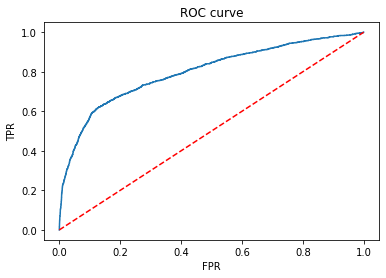

In [100]:
fpr, tpr, threshold = roc_curve(bank_y_test, pred_lm1[:,1])
plt.clf()
plt.plot(fpr, tpr, )
plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [101]:
# Prediction on test dataset
pred_lm_test = logmodel.predict(bank_test)
pred_lm_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
submission=pd.read_csv("C:/Training/Final Project/Final_Predictions/sample_submission.csv")

In [103]:
submission['y']=pred_lm_test 
submission['Id']=bank_test_backup['Id']

In [104]:
pd.DataFrame(submission, columns=['Id','y']).to_csv('C:/Training/Final Project/Final_Predictions/Final10.csv')

In [109]:
final=pd.read_csv(r"C:/Training/Final Project/Final_Predictions/Final10.csv")

In [110]:
final.head()

,Id,y,actual
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [111]:
tab_final = confusion_matrix(pred_lm_test, final.actual, labels=[1,0])
tab_final

array([[ 278,  543],
       [ 173, 3125]], dtype=int64)

In [112]:
print(accuracy_score(final.actual, pred_lm_test))

0.826171400825443


In [113]:
print(classification_report(final.actual, pred_lm_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3668
           1       0.34      0.62      0.44       451

    accuracy                           0.83      4119
   macro avg       0.64      0.73      0.67      4119
weighted avg       0.88      0.83      0.85      4119



In [114]:
pred_final1 = logmodel.predict_proba(bank_test)
pred_final1

array([[0.51860091, 0.48139909],
       [0.76914892, 0.23085108],
       [0.72683662, 0.27316338],
       ...,
       [0.6045402 , 0.3954598 ],
       [0.660496  , 0.339504  ],
       [0.67131029, 0.32868971]])

In [115]:
print("AUC score: ", roc_auc_score(final.actual, pred_final1[:,1]))

AUC score:  0.7838225124345026


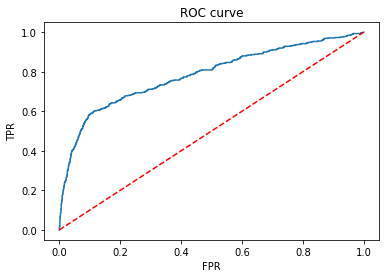

In [116]:
fpr, tpr, threshold = roc_curve(final.actual, pred_final1[:,1])
plt.clf()
plt.plot(fpr, tpr, )
plt.plot([0,1],[0,1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()